# Exploratory Data Analysis and Data Cleaning

> Import statements

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from dateutil import parser
from sklearn.model_selection import train_test_split
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix

%matplotlib inline
sns.set()

> Naming our datasets

In [2]:
crashes = pd.read_csv('../../Traffic_Crashes_-_Crashes.csv')

In [3]:
# Low_memory=False, because it has mixed types of data in the same column/too many rows
people = pd.read_csv('../../Traffic_Crashes_-_People.csv', low_memory=False)

In [4]:
vehicles = pd.read_csv('../../Traffic_Crashes_-_Vehicles.csv', low_memory=False)

> Defining functions that we are going to use later on

In [5]:
def howmanyunique(data):
    """ Returns number of unique values per column"""
    temp = []
    name = []
    for x in data.columns:
        temp.append(len(data[x].value_counts().unique()))
        name.append(x)
    print(temp)
    print('')
    print(name)

In [6]:
def columns_w_nan(data):
    """ Returns the columns that have over 30% of its data as missing value """
    temp = []
    for x in data.columns:
        if data[x].isna().sum() > 0:
            percentage_of_data = data[x].isna().sum()/(list(data.shape)[0])
            print("Row: {} : is made {}% of NaN Values.".format(x, percentage_of_data.round(3)))
            if percentage_of_data > 0.3:
                temp.append(x)
    print('')            
    print(temp)

In [7]:
def howmanyduplicates(data):
    """ Returns the whole amount of duplicates in the dataset """
    print(data.duplicated().sum())

In [8]:
def isitaholiday(date):
    """This function is created for a specific dataframe for a creation of a binary column
    saying either is or not a holiday in the U.S."""
    if date.date() in holidays_date:
        return 1
    else: 
        return 0

In [9]:
def columns_repeat(data, data1, data2):
    """" This function has as objective to:
    1 - Find possible columns to merge dataframes
    2 - Find columns that have to be deleted before the merging
    """
    data_columns = []
    data1_columns = []
    data2_columns = []
    data_data1 = []
    data_data2 = []
    data_data3 = []
    for x in data.columns:
        data_columns.append(x)
    for y in data1.columns:
        data1_columns.append(y)
    for z in data2.columns:
        data2_columns.append(z)
     
    for a in data_columns:
        if a in data1_columns:
            data_data1.append(a)
            
    for b in data_columns:
        if b in data2_columns:
            data_data2.append(b)
    
    for c in data1_columns:
        if c in data2_columns:
            data_data3.append(c)
        
    return(data_data1, data_data2, data_data3)
        

In [10]:
def basic_info(data):
    """ Gets basic information to understand more of the data, also useful to delete columns that we know are categorical"""
    print("Dataset shape is: ", data.shape)
    print("Dataset size is: ", data.size)
    print("Dataset columns are: ", data.columns)
    print("Dataset info is: ", data.info())
    categorical = []
    numerical = []
    for i in data.columns:
        if data[i].dtype == object:
            categorical.append(i)
        else:
            numerical.append(i)
    print("Categorical variables are:\n ", categorical)
    print("Numerical variables are:\n ", numerical)
    return categorical, numerical

In [11]:
def making_new_df(data, columnlist):
    """ Returns a new dataset based on the one provided, but with dummy columns """
    for i in columnlist:
        dummy = pd.get_dummies(data[i])
        del dummy[dummy.columns[-1]]
        data = pd.concat([data, dummy], axis = 1)
    return data

In [12]:
def new_df(data, columnlist):
    """ Returns a new dataset based on the one provided, but with dummy columns """
    for i in columnlist:
        dummy = pd.get_dummies(data[i])
        #print(dummy)
        del dummy[dummy.columns[-1]]
        data = pd.concat([data, dummy], axis = 1)
    return data

# Crashes Data Set

In [13]:
basic_info(crashes)

Dataset shape is:  (484022, 49)
Dataset size is:  23717078
Dataset columns are:  Index(['CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
      

(['CRASH_RECORD_ID',
  'RD_NO',
  'CRASH_DATE_EST_I',
  'CRASH_DATE',
  'TRAFFIC_CONTROL_DEVICE',
  'DEVICE_CONDITION',
  'WEATHER_CONDITION',
  'LIGHTING_CONDITION',
  'FIRST_CRASH_TYPE',
  'TRAFFICWAY_TYPE',
  'ALIGNMENT',
  'ROADWAY_SURFACE_COND',
  'ROAD_DEFECT',
  'REPORT_TYPE',
  'CRASH_TYPE',
  'INTERSECTION_RELATED_I',
  'NOT_RIGHT_OF_WAY_I',
  'HIT_AND_RUN_I',
  'DAMAGE',
  'DATE_POLICE_NOTIFIED',
  'PRIM_CONTRIBUTORY_CAUSE',
  'SEC_CONTRIBUTORY_CAUSE',
  'STREET_DIRECTION',
  'STREET_NAME',
  'PHOTOS_TAKEN_I',
  'STATEMENTS_TAKEN_I',
  'DOORING_I',
  'WORK_ZONE_I',
  'WORK_ZONE_TYPE',
  'WORKERS_PRESENT_I',
  'MOST_SEVERE_INJURY',
  'LOCATION'],
 ['POSTED_SPEED_LIMIT',
  'LANE_CNT',
  'STREET_NO',
  'BEAT_OF_OCCURRENCE',
  'NUM_UNITS',
  'INJURIES_TOTAL',
  'INJURIES_FATAL',
  'INJURIES_INCAPACITATING',
  'INJURIES_NON_INCAPACITATING',
  'INJURIES_REPORTED_NOT_EVIDENT',
  'INJURIES_NO_INDICATION',
  'INJURIES_UNKNOWN',
  'CRASH_HOUR',
  'CRASH_DAY_OF_WEEK',
  'CRASH_MONTH',
 

In [14]:
crashes.shape

(484022, 49)

In [15]:
howmanyduplicates(crashes)

0


In [16]:
columns_w_nan(crashes)

Row: RD_NO : is made 0.007% of NaN Values.
Row: CRASH_DATE_EST_I : is made 0.925% of NaN Values.
Row: LANE_CNT : is made 0.589% of NaN Values.
Row: REPORT_TYPE : is made 0.024% of NaN Values.
Row: INTERSECTION_RELATED_I : is made 0.774% of NaN Values.
Row: NOT_RIGHT_OF_WAY_I : is made 0.953% of NaN Values.
Row: HIT_AND_RUN_I : is made 0.706% of NaN Values.
Row: STREET_DIRECTION : is made 0.0% of NaN Values.
Row: STREET_NAME : is made 0.0% of NaN Values.
Row: BEAT_OF_OCCURRENCE : is made 0.0% of NaN Values.
Row: PHOTOS_TAKEN_I : is made 0.987% of NaN Values.
Row: STATEMENTS_TAKEN_I : is made 0.98% of NaN Values.
Row: DOORING_I : is made 0.997% of NaN Values.
Row: WORK_ZONE_I : is made 0.994% of NaN Values.
Row: WORK_ZONE_TYPE : is made 0.995% of NaN Values.
Row: WORKERS_PRESENT_I : is made 0.998% of NaN Values.
Row: MOST_SEVERE_INJURY : is made 0.002% of NaN Values.
Row: INJURIES_TOTAL : is made 0.002% of NaN Values.
Row: INJURIES_FATAL : is made 0.002% of NaN Values.
Row: INJURIES_INCA

In [17]:
# We are going to drop all the columns with a lot of of NaN values, except for location that we can say right ahead that is
# a multicolinearity case, since it has the Latiutude and Longitude together
crashes = crashes.drop(columns=['CRASH_DATE_EST_I', 'LANE_CNT', 'INTERSECTION_RELATED_I',
                                'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'PHOTOS_TAKEN_I', 
                                'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I', 'WORK_ZONE_TYPE',
                                'WORKERS_PRESENT_I', 'LOCATION'])

### Data Manipulation with Missing Values (NaN)

> **RD_NO**

So we can see here that RD_NO and REPORT_TYPE still have a lot of missing data and that can be explained by the website, where they say:


> " For privacy reasons, this column is blank for recent crashes."

So since the RD_NO is another way to connect the cases between datasets, we can easily discard the whole column, because we still have CRASH_RECORD_ID, that has no missing values

> **REPORT_TYPE**

In [18]:
crashes.REPORT_TYPE.value_counts()

NOT ON SCENE (DESK REPORT)    278124
ON SCENE                      193888
AMENDED                          240
Name: REPORT_TYPE, dtype: int64

By checking the REPORT_TYPE column we realize that it doesn't offer any predictive value to our model, but still might use it for the business understanding part.

> So we decide to drop the RD_NO columns because we have a good substitute and drop the rows where the remaining NaN values are, so we have a cleaner dataset

In [19]:
crashes = crashes.drop(columns=['RD_NO', 'REPORT_TYPE'])

In [20]:
# Now we can drop the remaining rows with NaN values
crashes.dropna(inplace=True)

In [21]:
crashes.isna().sum().sum()

0

### Since "Injuries_Fatal" is important, let's give some more attention to it

We want to transform the column into a binary instead of number of deaths per accident.

In [22]:
crashes.INJURIES_FATAL.value_counts(dropna=False)

0.0    479895
1.0       436
2.0        28
3.0         5
4.0         1
Name: INJURIES_FATAL, dtype: int64

In [23]:
crashes['INJURIES_FATAL'] = np.where(crashes['INJURIES_FATAL']>0, 1, 0)

In [24]:
crashes.INJURIES_FATAL.value_counts(dropna=False)

0    479895
1       470
Name: INJURIES_FATAL, dtype: int64

## Some more data manipulation with useful columns

Let's do some more binning of the values that we might foresee playing a big role 

### WEATHER_CONDITION

In [25]:
crashes.WEATHER_CONDITION.value_counts()

CLEAR                       378874
RAIN                         42409
UNKNOWN                      20935
SNOW                         19996
CLOUDY/OVERCAST              14248
OTHER                         1555
FOG/SMOKE/HAZE                 822
SLEET/HAIL                     710
FREEZING RAIN/DRIZZLE          570
BLOWING SNOW                   157
SEVERE CROSS WIND GATE          87
BLOWING SAND, SOIL, DIRT         2
Name: WEATHER_CONDITION, dtype: int64

In [26]:
crashes.WEATHER_CONDITION = np.where(crashes.WEATHER_CONDITION=='BLOWING SNOW', 'SNOW', crashes.WEATHER_CONDITION)

In [27]:
crashes.WEATHER_CONDITION = np.where(crashes.WEATHER_CONDITION=='FREEZING RAIN/DRIZZLE', 'RAIN', crashes.WEATHER_CONDITION)

In [28]:
crashes.WEATHER_CONDITION = np.where(crashes.WEATHER_CONDITION=='FOG/SMOKE/HAZE', 'OTHER', crashes.WEATHER_CONDITION)

In [29]:
crashes.WEATHER_CONDITION = np.where(crashes.WEATHER_CONDITION=='SLEET/HAIL', 'OTHER', crashes.WEATHER_CONDITION)

In [30]:
crashes.WEATHER_CONDITION = np.where(crashes.WEATHER_CONDITION=='BLOWING SAND, SOIL, DIRT', 'OTHER', crashes.WEATHER_CONDITION)

In [31]:
crashes.WEATHER_CONDITION = np.where(crashes.WEATHER_CONDITION=='SEVERE CROSS WIND GATE', 'OTHER', crashes.WEATHER_CONDITION)

In [32]:
crashes.WEATHER_CONDITION.value_counts()

CLEAR              378874
RAIN                42979
UNKNOWN             20935
SNOW                20153
CLOUDY/OVERCAST     14248
OTHER                3176
Name: WEATHER_CONDITION, dtype: int64

### POSTED_SPEED_LIMIT

In [33]:
# Binning Posted_Speed_Limit
crashes.POSTED_SPEED_LIMIT.value_counts()

30    354330
35     33139
25     29143
20     18551
15     16668
10     10073
0       6722
40      4377
5       3625
45      2771
55       369
3        116
50        95
9         91
99        66
39        53
1         34
60        24
2         19
24        16
32        14
33        10
34        10
65        10
6          7
11         5
36         5
70         3
7          2
14         2
12         2
18         2
31         2
26         2
49         1
38         1
22         1
63         1
4          1
23         1
29         1
Name: POSTED_SPEED_LIMIT, dtype: int64

In [34]:
# Let's bin the speed limit in 9 groups, going up 5 miles per group and the last one being 45 miles/hour or above
crashes.POSTED_SPEED_LIMIT = pd.cut(crashes.POSTED_SPEED_LIMIT,[0, 5, 10, 15, 20, 25, 30, 35, 40, 45],
                                    precision=0, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8])

In [35]:
crashes.POSTED_SPEED_LIMIT.value_counts()

5    354333
6     33175
4     29161
3     18553
2     16677
1     10173
7      4436
0      3795
8      2771
Name: POSTED_SPEED_LIMIT, dtype: int64

In [36]:
# Now that we did some cleaning of the columns, rows and some binning we can run the function howmanyunique
howmanyunique(crashes)

[1, 21, 9, 19, 8, 6, 6, 18, 20, 6, 7, 7, 2, 3, 12, 40, 39, 421, 4, 491, 259, 13, 5, 15, 2, 8, 14, 12, 25, 1, 24, 7, 12, 136, 136]

['CRASH_RECORD_ID', 'CRASH_DATE', 'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION', 'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE', 'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT', 'CRASH_TYPE', 'DAMAGE', 'DATE_POLICE_NOTIFIED', 'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO', 'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'LATITUDE', 'LONGITUDE']


> We see that CRASH_HOUR could use some binning:

In [37]:
crashes.CRASH_HOUR.value_counts()

16    36738
15    36585
17    36275
14    32595
18    29997
13    29695
12    28561
8     25694
11    24734
9     22566
10    22195
19    21908
7     20742
20    17309
21    15408
22    14149
23    11896
6     10815
0      9666
1      8130
2      7025
5      6579
3      5776
4      5327
Name: CRASH_HOUR, dtype: int64

In [38]:
crashes.CRASH_HOUR = pd.cut(crashes.CRASH_HOUR,[0, 6, 12, 18, 24],
                                    precision=0, labels=[0, 1, 2, 3])

In [39]:
crashes.CRASH_HOUR.value_counts()

2    201885
1    144492
3     80670
0     43652
Name: CRASH_HOUR, dtype: int64

> Finally we get to our target, which has an imbalance with it's values.
- So we decide to do some feature engineering to bin and rename them

In [40]:
crashes.MOST_SEVERE_INJURY.value_counts()

NO INDICATION OF INJURY     418660
NONINCAPACITATING INJURY     34158
REPORTED, NOT EVIDENT        19259
INCAPACITATING INJURY         7818
FATAL                          470
Name: MOST_SEVERE_INJURY, dtype: int64

In [41]:
crashes['MOST_SEVERE_INJURY'] = np.where(crashes['MOST_SEVERE_INJURY']=='REPORTED, NOT EVIDENT',
                                         'NONINCAPACITATING INJURY', crashes['MOST_SEVERE_INJURY'])

In [42]:
crashes['MOST_SEVERE_INJURY'] = np.where(crashes['MOST_SEVERE_INJURY']=='FATAL',
                                         'INCAPACITATING INJURY', crashes['MOST_SEVERE_INJURY'])

In [43]:
crashes['MOST_SEVERE_INJURY'] = np.where(crashes['MOST_SEVERE_INJURY']=='INCAPACITATING INJURY',
                                         'INCAPACITATING INJURY/FATAL', crashes['MOST_SEVERE_INJURY'])

In [44]:
crashes.MOST_SEVERE_INJURY.value_counts()

NO INDICATION OF INJURY        418660
NONINCAPACITATING INJURY        53417
INCAPACITATING INJURY/FATAL      8288
Name: MOST_SEVERE_INJURY, dtype: int64

### Implementing the columns Holidays in the dataset

- Can we explore and see if holidays play a part on accidents?

In [45]:
# CRASH_DATE is a string
crashes['CRASH_DATE'][0]

'07/10/2019 05:56:00 PM'

In [46]:
# We can check that here
type(crashes['CRASH_DATE'][0])

str

In [47]:
# We create a new column Date-Time with the previous column
crashes['DATE_ACCIDENT']= pd.to_datetime(crashes['CRASH_DATE'], format='%m/%d/%Y %I:%M:%S %p')

In [48]:
# We confirm that it worked
type(crashes.DATE_ACCIDENT[0])

pandas._libs.tslibs.timestamps.Timestamp

In [49]:
# Our earliest and latest date
print("Earliest Date: {} \nLatest Date: {}".format(crashes['DATE_ACCIDENT'].min(), crashes['DATE_ACCIDENT'].max()))

Earliest Date: 2013-03-03 16:48:00 
Latest Date: 2021-03-09 23:10:00


In [50]:
holidays = pd.tseries.holiday.USFederalHolidayCalendar().holidays(start='2012', end='2022').to_pydatetime()

In [51]:
holidays_date = [holiday.date() for holiday in holidays]


In [52]:
holidays_date[:3]

[datetime.date(2012, 1, 2),
 datetime.date(2012, 1, 16),
 datetime.date(2012, 2, 20)]

In [53]:
isitaholiday(crashes['DATE_ACCIDENT'][100])

0

In [54]:
holidays[1].date()

datetime.date(2012, 1, 16)

In [55]:
crashes['IS_A_HOLIDAY'] = crashes['DATE_ACCIDENT'].apply(isitaholiday)

In [56]:
crashes['IS_A_HOLIDAY'].sum()

11366

In [57]:
crashes['DATE_ACCIDENT'][0].date()

datetime.date(2019, 7, 10)

In [58]:
crashes.drop(['CRASH_DATE'], axis = 1, inplace = True)

In [59]:
crashes.head(3)

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,DATE_ACCIDENT,IS_A_HOLIDAY
0,4fd0a3e0897b3335b94cd8d5b2d2b350eb691add56c62d...,6,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,TURNING,ONE-WAY,STRAIGHT AND LEVEL,DRY,...,0.0,3.0,0.0,2,4,7,41.919664,-87.773288,2019-07-10 17:56:00,0
1,009e9e67203442370272e1a13d6ee51a4155dac65e583d...,6,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,DRY,...,0.0,3.0,0.0,2,6,6,41.741804,-87.740954,2017-06-30 16:00:00,0
2,ee9283eff3a55ac50ee58f3d9528ce1d689b1c4180b4c4...,5,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,FOUR WAY,STRAIGHT AND LEVEL,DRY,...,0.0,3.0,0.0,1,6,7,41.773456,-87.585022,2020-07-10 10:25:00,0


In [60]:
# Creating a new dataframe with only crashes that happened on holidays
crashes_holiday = crashes[crashes['IS_A_HOLIDAY']==1]

In [61]:
crashes_holiday.head(3)

,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,ALIGNMENT,ROADWAY_SURFACE_COND,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,DATE_ACCIDENT,IS_A_HOLIDAY
155,3bfec94191bdc869600d2c429c45a68871eb9733ce7ec6...,4,NO CONTROLS,NO CONTROLS,SNOW,DAYLIGHT,PARKED MOTOR VEHICLE,NOT DIVIDED,STRAIGHT AND LEVEL,SNOW OR SLUSH,...,0.0,1.0,0.0,1,6,11,41.932213,-87.653694,2017-11-10 12:45:00,1
168,43292e98b1ba60cb4c6efeb987a67a1ec0291acea4357e...,7,NO CONTROLS,OTHER,RAIN,"DARKNESS, LIGHTED ROAD",TURNING,NOT DIVIDED,STRAIGHT AND LEVEL,WET,...,0.0,4.0,0.0,NaN,2,2,41.880660,-87.740728,2018-02-19 00:25:00,1
234,5e45d4537c4d0bd12bfa11a7f75526f4fe0d61c68a0ec1...,1,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",PARKED MOTOR VEHICLE,PARKING LOT,STRAIGHT AND LEVEL,WET,...,0.0,1.0,0.0,0,3,1,41.879714,-87.774496,2019-01-01 02:40:00,1


> We check for NaN values after all the feature engineering we did

In [62]:
crashes.isna().sum().sum()

16957

In [63]:
crashes.dropna(inplace=True)

In [64]:
crashes_holiday.isna().sum().sum()

492

In [65]:
crashes_holiday.dropna(inplace=True)

<ipython-input-65-2ec4761478ad>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashes_holiday.dropna(inplace=True)


### Some feature engineering to get the  name of the holiday on the new dataset :


In [66]:
period_of_time = pd.tseries.holiday.USFederalHolidayCalendar().holidays(start='2012', end='2022', return_name=True)

In [67]:
period_of_time.keys()

DatetimeIndex(['2012-01-02', '2012-01-16', '2012-02-20', '2012-05-28',
               '2012-07-04', '2012-09-03', '2012-10-08', '2012-11-12',
               '2012-11-22', '2012-12-25',
               ...
               '2021-01-18', '2021-02-15', '2021-05-31', '2021-07-05',
               '2021-09-06', '2021-10-11', '2021-11-11', '2021-11-25',
               '2021-12-24', '2021-12-31'],
              dtype='datetime64[ns]', length=101, freq=None)

In [68]:
period_of_time.keys()[0].date()

datetime.date(2012, 1, 2)

In [69]:
temporary_1 = []
for x in period_of_time:
    temporary_1.append(x)

In [70]:
temporary_2 = []
for x in period_of_time.keys():
    temporary_2.append(x.date())

In [71]:
dictionary_temporary = dict(zip(temporary_2, temporary_1))

In [72]:
dates_holidays = pd.DataFrame.from_dict(dictionary_temporary, orient='index')

In [73]:
crashes_holiday['DATE_REAL'] = crashes_holiday['DATE_ACCIDENT'].apply(lambda x : x.date())

<ipython-input-73-9c13a83f2a64>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crashes_holiday['DATE_REAL'] = crashes_holiday['DATE_ACCIDENT'].apply(lambda x : x.date())


In [74]:
dates_holidays.head(3)

,0
2012-01-02,New Years Day
2012-01-16,Martin Luther King Jr. Day
2012-02-20,Presidents Day


In [75]:
dates_holidays.index.name = 'DATE_REAL'

In [76]:
final_holidays = pd.merge(dates_holidays, crashes_holiday, on=['DATE_REAL'])
final_holidays.head(3)

,DATE_REAL,0,CRASH_RECORD_ID,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,DATE_ACCIDENT,IS_A_HOLIDAY
0,2014-11-11,Veterans Day,b15daae7f809226ff0cfc93865ddcf9ff60edcf4187dc4...,5,NO CONTROLS,NO CONTROLS,UNKNOWN,UNKNOWN,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,1.0,0.0,3,3,11,41.998270,-87.662997,2014-11-11 20:00:00,1
1,2015-05-25,Memorial Day,aa2ebe2aad2bbd41fbb7f6de1a3d7c695f539324d160d9...,5,STOP SIGN/FLASHER,FUNCTIONING PROPERLY,CLEAR,"DARKNESS, LIGHTED ROAD",HEAD ON,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,2.0,0.0,3,2,5,41.877407,-87.745018,2015-05-25 23:38:00,1
2,2015-09-07,Labor Day,0335e90fd6f5f3d1d54bf4113afa1fe5c283b140bfaf6b...,5,NO CONTROLS,NO CONTROLS,CLEAR,DAYLIGHT,SIDESWIPE SAME DIRECTION,ONE-WAY,...,0.0,2.0,0.0,2,2,9,41.888470,-87.629413,2015-09-07 16:45:00,1


# People Data Set

In [77]:
basic_info(people)

Dataset shape is:  (1069147, 30)
Dataset size is:  32074410
Dataset columns are:  Index(['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID',
       'CRASH_DATE', 'SEAT_NO', 'CITY', 'STATE', 'ZIPCODE', 'SEX', 'AGE',
       'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS', 'SAFETY_EQUIPMENT',
       'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'HOSPITAL',
       'EMS_AGENCY', 'EMS_RUN_NO', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'PEDPEDAL_ACTION', 'PEDPEDAL_VISIBILITY',
       'PEDPEDAL_LOCATION', 'BAC_RESULT', 'BAC_RESULT VALUE',
       'CELL_PHONE_USE'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1069147 entries, 0 to 1069146
Data columns (total 30 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   PERSON_ID              1069147 non-null  object 
 1   PERSON_TYPE            1069147 non-null  object 
 2   CRASH_RECORD_ID        1069147 

(['PERSON_ID',
  'PERSON_TYPE',
  'CRASH_RECORD_ID',
  'RD_NO',
  'CRASH_DATE',
  'CITY',
  'STATE',
  'ZIPCODE',
  'SEX',
  'DRIVERS_LICENSE_STATE',
  'DRIVERS_LICENSE_CLASS',
  'SAFETY_EQUIPMENT',
  'AIRBAG_DEPLOYED',
  'EJECTION',
  'INJURY_CLASSIFICATION',
  'HOSPITAL',
  'EMS_AGENCY',
  'EMS_RUN_NO',
  'DRIVER_ACTION',
  'DRIVER_VISION',
  'PHYSICAL_CONDITION',
  'PEDPEDAL_ACTION',
  'PEDPEDAL_VISIBILITY',
  'PEDPEDAL_LOCATION',
  'BAC_RESULT',
  'CELL_PHONE_USE'],
 ['VEHICLE_ID', 'SEAT_NO', 'AGE', 'BAC_RESULT VALUE'])

In [78]:
people.shape

(1069147, 30)

In [79]:
howmanyduplicates(people)

0


In [80]:
columns_w_nan(people)

Row: RD_NO : is made 0.007% of NaN Values.
Row: VEHICLE_ID : is made 0.02% of NaN Values.
Row: SEAT_NO : is made 0.796% of NaN Values.
Row: CITY : is made 0.261% of NaN Values.
Row: STATE : is made 0.253% of NaN Values.
Row: ZIPCODE : is made 0.325% of NaN Values.
Row: SEX : is made 0.015% of NaN Values.
Row: AGE : is made 0.285% of NaN Values.
Row: DRIVERS_LICENSE_STATE : is made 0.407% of NaN Values.
Row: DRIVERS_LICENSE_CLASS : is made 0.485% of NaN Values.
Row: SAFETY_EQUIPMENT : is made 0.003% of NaN Values.
Row: AIRBAG_DEPLOYED : is made 0.019% of NaN Values.
Row: EJECTION : is made 0.012% of NaN Values.
Row: INJURY_CLASSIFICATION : is made 0.001% of NaN Values.
Row: HOSPITAL : is made 0.818% of NaN Values.
Row: EMS_AGENCY : is made 0.884% of NaN Values.
Row: EMS_RUN_NO : is made 0.981% of NaN Values.
Row: DRIVER_ACTION : is made 0.206% of NaN Values.
Row: DRIVER_VISION : is made 0.207% of NaN Values.
Row: PHYSICAL_CONDITION : is made 0.206% of NaN Values.
Row: PEDPEDAL_ACTION : 

In [81]:
people = people.drop(columns=['SEAT_NO', 'ZIPCODE', 'DRIVERS_LICENSE_STATE', 'DRIVERS_LICENSE_CLASS',
                              'HOSPITAL', 'EMS_AGENCY', 'EMS_RUN_NO', 'PEDPEDAL_ACTION',
                              'PEDPEDAL_VISIBILITY', 'PEDPEDAL_LOCATION', 'BAC_RESULT VALUE', 'CELL_PHONE_USE'])

In [82]:
people.dropna(inplace=True)

In [83]:
people.isna().sum()

PERSON_ID                0
PERSON_TYPE              0
CRASH_RECORD_ID          0
RD_NO                    0
VEHICLE_ID               0
CRASH_DATE               0
CITY                     0
STATE                    0
SEX                      0
AGE                      0
SAFETY_EQUIPMENT         0
AIRBAG_DEPLOYED          0
EJECTION                 0
INJURY_CLASSIFICATION    0
DRIVER_ACTION            0
DRIVER_VISION            0
PHYSICAL_CONDITION       0
BAC_RESULT               0
dtype: int64

In [84]:
howmanyunique(people)

[1, 2, 11, 11, 1, 28, 291, 49, 3, 98, 10, 7, 5, 5, 19, 14, 12, 4]

['PERSON_ID', 'PERSON_TYPE', 'CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID', 'CRASH_DATE', 'CITY', 'STATE', 'SEX', 'AGE', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION', 'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT']


In [85]:
people.INJURY_CLASSIFICATION.value_counts()

NO INDICATION OF INJURY     540485
NONINCAPACITATING INJURY     22849
REPORTED, NOT EVIDENT        15391
INCAPACITATING INJURY         4186
FATAL                          237
Name: INJURY_CLASSIFICATION, dtype: int64

In [86]:
people.AIRBAG_DEPLOYED.value_counts()

DID NOT DEPLOY                            425305
NOT APPLICABLE                             91019
DEPLOYMENT UNKNOWN                         26896
DEPLOYED, FRONT                            22228
DEPLOYED, COMBINATION                      12206
DEPLOYED, SIDE                              5208
DEPLOYED OTHER (KNEE, AIR, BELT, ETC.)       286
Name: AIRBAG_DEPLOYED, dtype: int64

In [87]:
people.EJECTION.value_counts()

NONE                  572084
UNKNOWN                 8366
TOTALLY EJECTED         1786
PARTIALLY EJECTED        546
TRAPPED/EXTRICATED       366
Name: EJECTION, dtype: int64

In [88]:
people.PHYSICAL_CONDITION.value_counts()

NORMAL                          497653
UNKNOWN                          73147
IMPAIRED - ALCOHOL                3471
REMOVED BY EMS                    2036
FATIGUED/ASLEEP                   2023
OTHER                             1549
EMOTIONAL                         1481
ILLNESS/FAINTED                    709
HAD BEEN DRINKING                  439
IMPAIRED - DRUGS                   399
IMPAIRED - ALCOHOL AND DRUGS       148
MEDICATED                           93
Name: PHYSICAL_CONDITION, dtype: int64

In [89]:
people.PERSON_TYPE.value_counts()

DRIVER                 583110
NON-CONTACT VEHICLE        38
Name: PERSON_TYPE, dtype: int64

In [90]:
people.AGE.value_counts()

 25.0     17282
 27.0     17243
 26.0     17138
 28.0     16764
 24.0     16425
          ...  
 108.0        2
-1.0          1
-49.0         1
 107.0        1
-47.0         1
Name: AGE, Length: 111, dtype: int64

**We notice negative ages and ages over 100, so since that must be an entry mistake we try to fix as much as possible**
- We also want to bin the values a little


In [91]:
people.AGE.mean()

40.14334439970642

In [92]:
people['AGE'] = np.where(people['AGE']>100, 40, people['AGE'])

In [93]:
people['AGE'] = np.where(people['AGE']<0, 40, people['AGE'])

- Now we do some binning:

In [94]:
people['AGE'] = pd.cut(people['AGE'], [0, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70, 75, 80],
                                    precision=0, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13])

In [95]:
# We decide to bin under 15 since it is interesting to bin all under of age 16 together
people.AGE.value_counts()

3     82853
2     74551
4     69578
5     60863
6     52421
7     49951
8     45385
9     39745
1     31148
10    29674
11    18931
12    10800
13     6255
0       571
Name: AGE, dtype: int64

> We decide to not do anymore binning here because the subject it's either too subjective or needed some more detailed information

# Vehicles Data Set

**SEAT_NO**
- Code for seating position of motor vehicle occupant: 1= driver, 2= center front, 3 = front passenger, 4 = second row left, 5 = second row center, 6 = second row right, 7 = enclosed passengers, 8 = exposed passengers, 9= unknown position, 10 = third row left, 11 = third row center, 12 = third row right

In [96]:
basic_info(vehicles)

Dataset shape is:  (988131, 72)
Dataset size is:  71145432
Dataset columns are:  Index(['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'UNIT_NO',
       'UNIT_TYPE', 'NUM_PASSENGERS', 'VEHICLE_ID', 'CMRC_VEH_I', 'MAKE',
       'MODEL', 'LIC_PLATE_STATE', 'VEHICLE_YEAR', 'VEHICLE_DEFECT',
       'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER',
       'TOWED_I', 'FIRE_I', 'OCCUPANT_CNT', 'EXCEED_SPEED_LIMIT_I', 'TOWED_BY',
       'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I',
       'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I',
       'AREA_09_I', 'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I',
       'FIRST_CONTACT_POINT', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 'ILCC_NO',
       'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE',
       'CARRIER_CITY', 'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO',
       'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I', 'HAZMAT_REPORT_NO',
       'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CR

(['CRASH_RECORD_ID',
  'RD_NO',
  'CRASH_DATE',
  'UNIT_TYPE',
  'CMRC_VEH_I',
  'MAKE',
  'MODEL',
  'LIC_PLATE_STATE',
  'VEHICLE_DEFECT',
  'VEHICLE_TYPE',
  'VEHICLE_USE',
  'TRAVEL_DIRECTION',
  'MANEUVER',
  'TOWED_I',
  'FIRE_I',
  'EXCEED_SPEED_LIMIT_I',
  'TOWED_BY',
  'TOWED_TO',
  'AREA_00_I',
  'AREA_01_I',
  'AREA_02_I',
  'AREA_03_I',
  'AREA_04_I',
  'AREA_05_I',
  'AREA_06_I',
  'AREA_07_I',
  'AREA_08_I',
  'AREA_09_I',
  'AREA_10_I',
  'AREA_11_I',
  'AREA_12_I',
  'AREA_99_I',
  'FIRST_CONTACT_POINT',
  'USDOT_NO',
  'CCMC_NO',
  'ILCC_NO',
  'COMMERCIAL_SRC',
  'GVWR',
  'CARRIER_NAME',
  'CARRIER_STATE',
  'CARRIER_CITY',
  'HAZMAT_PLACARDS_I',
  'HAZMAT_NAME',
  'UN_NO',
  'HAZMAT_PRESENT_I',
  'HAZMAT_REPORT_I',
  'HAZMAT_REPORT_NO',
  'MCS_REPORT_I',
  'MCS_REPORT_NO',
  'HAZMAT_VIO_CAUSE_CRASH_I',
  'MCS_VIO_CAUSE_CRASH_I',
  'IDOT_PERMIT_NO',
  'WIDE_LOAD_I',
  'TRAILER1_WIDTH',
  'TRAILER2_WIDTH',
  'VEHICLE_CONFIG',
  'CARGO_BODY_TYPE',
  'LOAD_TYPE',
  'HAZ

In [97]:
vehicles.shape

(988131, 72)

In [98]:
howmanyduplicates(vehicles)

0


In [99]:
columns_w_nan(vehicles)

Row: RD_NO : is made 0.007% of NaN Values.
Row: UNIT_TYPE : is made 0.002% of NaN Values.
Row: NUM_PASSENGERS : is made 0.85% of NaN Values.
Row: VEHICLE_ID : is made 0.023% of NaN Values.
Row: CMRC_VEH_I : is made 0.981% of NaN Values.
Row: MAKE : is made 0.023% of NaN Values.
Row: MODEL : is made 0.023% of NaN Values.
Row: LIC_PLATE_STATE : is made 0.106% of NaN Values.
Row: VEHICLE_YEAR : is made 0.181% of NaN Values.
Row: VEHICLE_DEFECT : is made 0.023% of NaN Values.
Row: VEHICLE_TYPE : is made 0.023% of NaN Values.
Row: VEHICLE_USE : is made 0.023% of NaN Values.
Row: TRAVEL_DIRECTION : is made 0.023% of NaN Values.
Row: MANEUVER : is made 0.023% of NaN Values.
Row: TOWED_I : is made 0.887% of NaN Values.
Row: FIRE_I : is made 0.999% of NaN Values.
Row: OCCUPANT_CNT : is made 0.023% of NaN Values.
Row: EXCEED_SPEED_LIMIT_I : is made 0.998% of NaN Values.
Row: TOWED_BY : is made 0.918% of NaN Values.
Row: TOWED_TO : is made 0.948% of NaN Values.
Row: AREA_00_I : is made 0.961% of 

In [100]:
vehicles = vehicles.drop(columns=['NUM_PASSENGERS', 'CMRC_VEH_I', 'TOWED_I', 'FIRE_I', 'EXCEED_SPEED_LIMIT_I', 
                                  'TOWED_BY', 'TOWED_TO', 'AREA_00_I', 'AREA_01_I', 'AREA_02_I', 'AREA_03_I', 
                                  'AREA_04_I', 'AREA_05_I', 'AREA_06_I', 'AREA_07_I', 'AREA_08_I', 'AREA_09_I', 
                                  'AREA_10_I', 'AREA_11_I', 'AREA_12_I', 'AREA_99_I', 'CMV_ID', 'USDOT_NO', 'CCMC_NO', 
                                  'ILCC_NO', 'COMMERCIAL_SRC', 'GVWR', 'CARRIER_NAME', 'CARRIER_STATE', 'CARRIER_CITY',
                                  'HAZMAT_PLACARDS_I', 'HAZMAT_NAME', 'UN_NO', 'HAZMAT_PRESENT_I', 'HAZMAT_REPORT_I',
                                  'HAZMAT_REPORT_NO', 'MCS_REPORT_I', 'MCS_REPORT_NO', 'HAZMAT_VIO_CAUSE_CRASH_I',
                                  'MCS_VIO_CAUSE_CRASH_I', 'IDOT_PERMIT_NO', 'WIDE_LOAD_I', 'TRAILER1_WIDTH',
                                  'TRAILER2_WIDTH', 'TRAILER1_LENGTH', 'TRAILER2_LENGTH', 'TOTAL_VEHICLE_LENGTH',
                                  'AXLE_CNT', 'VEHICLE_CONFIG', 'CARGO_BODY_TYPE', 'LOAD_TYPE', 'HAZMAT_OUT_OF_SERVICE_I',
                                  'MCS_OUT_OF_SERVICE_I', 'HAZMAT_CLASS', 'LIC_PLATE_STATE'])

In [101]:
vehicles.dropna(inplace=True)

In [102]:
vehicles.isna().sum().sum()

0

In [103]:
howmanyunique(vehicles)

[1, 16, 16, 35, 15, 5, 1, 140, 498, 70, 16, 22, 25, 9, 28, 24, 14]

['CRASH_UNIT_ID', 'CRASH_RECORD_ID', 'RD_NO', 'CRASH_DATE', 'UNIT_NO', 'UNIT_TYPE', 'VEHICLE_ID', 'MAKE', 'MODEL', 'VEHICLE_YEAR', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE', 'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'FIRST_CONTACT_POINT']


We have to pay attention to some columns that we might want to drop later when treating the final dataframe

In [104]:
maker_and_count = dict(zip(list(vehicles.MAKE.value_counts().index),list(vehicles.MAKE.value_counts())))

In [105]:
temp_vehicles = pd.DataFrame.from_dict(data=maker_and_count, orient='index', columns=['COUNT'])

In [106]:
temp_vehicles.reset_index(level=None, inplace=True)

In [107]:
temp_vehicles.columns = ['MAKE', 'COUNT']

In [108]:
temp_vehicles.head(3)

,MAKE,COUNT
0,CHEVROLET,103013
1,FORD,86881
2,"TOYOTA MOTOR COMPANY, LTD.",83343


**We see that some brands only appear once, which probably is a mistake on the entry judging by the size of the dataset**
- So we decide to set as a threshhold "Makers" that appear at least 10 times

In [109]:
temp_vehicles= temp_vehicles.sort_values(by=['COUNT'], ascending=True)

In [110]:
temp_vehicles = temp_vehicles[712:]

In [111]:
temp_vehicles.head(3)

,MAKE,COUNT
196,EAGLE,10
197,POLAR MFG. CO.,10
198,WABCO CONSTRUCTION & MINING EQUIPMENT GROUP,10


We are done for now with Exploratory Analysis

### Let's work on the big dataset that we are going to use for modeling

- **We call the function on the 3 cleaned datasets**

In [112]:
columns_repeat(people, crashes, vehicles)

(['CRASH_RECORD_ID'],
 ['CRASH_RECORD_ID', 'RD_NO', 'VEHICLE_ID', 'CRASH_DATE'],
 ['CRASH_RECORD_ID'])

In [113]:
# Since we only want ONE columns to be repeated, we drop the others that repeat, 
# otherwise we would have negative influence on our modeling
vehicles = vehicles.drop(columns=['RD_NO', 'VEHICLE_ID', 'CRASH_DATE'])

In [114]:
# Now we verify if all the datasets have only ONE column in common
columns_repeat(people, crashes, vehicles)

(['CRASH_RECORD_ID'], ['CRASH_RECORD_ID'], ['CRASH_RECORD_ID'])

In [115]:
# Join the 3 datasets together
inner_merged_total = pd.merge(vehicles, crashes, on=['CRASH_RECORD_ID'])
inner_merged_total.shape

(764811, 49)

In [116]:
inner_merged_total = pd.merge(inner_merged_total, people, on=['CRASH_RECORD_ID'])
inner_merged_total.shape

(1064886, 66)

## We do some downsampling within the target

In [117]:
df = inner_merged_total.sort_values(by=['MOST_SEVERE_INJURY'], ascending=False)

In [118]:
df['MOST_SEVERE_INJURY'].value_counts()

NO INDICATION OF INJURY        895559
NONINCAPACITATING INJURY       148016
INCAPACITATING INJURY/FATAL     21311
Name: MOST_SEVERE_INJURY, dtype: int64

In [119]:
# So we notice that we have to remove 126,705 from Nonincapacitating and 874,248 from NO INDICATION OF INJURY
df.shape

(1064886, 66)

In [120]:
df['MOST_SEVERE_INJURY'].head(3)

453159    NONINCAPACITATING INJURY
957423    NONINCAPACITATING INJURY
128731    NONINCAPACITATING INJURY
Name: MOST_SEVERE_INJURY, dtype: object

In [121]:
df = df[126705:]

In [122]:
df['MOST_SEVERE_INJURY'] = np.where(df['MOST_SEVERE_INJURY']=='NO INDICATION OF INJURY',
                                         'aNO INDICATION OF INJURY', df['MOST_SEVERE_INJURY'])

In [123]:
df['MOST_SEVERE_INJURY'].value_counts()

aNO INDICATION OF INJURY       895559
NONINCAPACITATING INJURY        21311
INCAPACITATING INJURY/FATAL     21311
Name: MOST_SEVERE_INJURY, dtype: int64

In [124]:
df = df.sort_values(by=['MOST_SEVERE_INJURY'], ascending=False)

In [125]:
df = df[874248:]

In [126]:
df['MOST_SEVERE_INJURY'].value_counts()

aNO INDICATION OF INJURY       21311
NONINCAPACITATING INJURY       21311
INCAPACITATING INJURY/FATAL    21311
Name: MOST_SEVERE_INJURY, dtype: int64

In [127]:
df['MOST_SEVERE_INJURY'] = np.where(df['MOST_SEVERE_INJURY']=='aNO INDICATION OF INJURY',
                                         'NO INDICATION OF INJURY', df['MOST_SEVERE_INJURY'])

In [128]:
df.isna().sum().sum()

1188

In [129]:
df_no_target = df.drop(columns=['MOST_SEVERE_INJURY'])

In [130]:
df_no_target.shape

(63933, 65)

In [131]:
delete_temp1 = []
for x in df_no_target.columns:
    print("Unique Values: {} :  {} Column Name.".format(len(df_no_target[x].value_counts()), x))
    if len(df_no_target[x].value_counts()) > 50:
            delete_temp1.append(x)

Unique Values: 36861 :  CRASH_UNIT_ID Column Name.
Unique Values: 20210 :  CRASH_RECORD_ID Column Name.
Unique Values: 10 :  UNIT_NO Column Name.
Unique Values: 5 :  UNIT_TYPE Column Name.
Unique Values: 222 :  MAKE Column Name.
Unique Values: 1080 :  MODEL Column Name.
Unique Values: 67 :  VEHICLE_YEAR Column Name.
Unique Values: 13 :  VEHICLE_DEFECT Column Name.
Unique Values: 21 :  VEHICLE_TYPE Column Name.
Unique Values: 23 :  VEHICLE_USE Column Name.
Unique Values: 9 :  TRAVEL_DIRECTION Column Name.
Unique Values: 28 :  MANEUVER Column Name.
Unique Values: 20 :  OCCUPANT_CNT Column Name.
Unique Values: 14 :  FIRST_CONTACT_POINT Column Name.
Unique Values: 9 :  POSTED_SPEED_LIMIT Column Name.
Unique Values: 18 :  TRAFFIC_CONTROL_DEVICE Column Name.
Unique Values: 8 :  DEVICE_CONDITION Column Name.
Unique Values: 6 :  WEATHER_CONDITION Column Name.
Unique Values: 6 :  LIGHTING_CONDITION Column Name.
Unique Values: 18 :  FIRST_CRASH_TYPE Column Name.
Unique Values: 20 :  TRAFFICWAY_T

In [132]:
df_no_target = df_no_target.drop(columns=delete_temp1)

In [133]:
df_no_target = df_no_target.drop(columns='PERSON_TYPE')

In [134]:
df_no_target.columns

Index(['UNIT_NO', 'UNIT_TYPE', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'FIRST_CONTACT_POINT',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'NUM_UNITS',
       'INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT',
       'INJURIES_NO_INDICATION', 'INJURIES_UNKNOWN', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'IS_A_HOLIDAY', 'STATE', 'SEX',
       'AGE', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION',
       'INJURY_CLASSIFICATION', 'DRIVER_ACTION', 'DRIVER_VISION',
       'PHYSICAL_CONDITION', 'BAC_RESULT'],
      dtype='object')

In [135]:
# Here we drop anything with injury information so we don't leak information to the target
df_no_target = df_no_target.drop(columns=['INJURIES_TOTAL', 'INJURIES_FATAL', 'INJURIES_INCAPACITATING',
       'INJURIES_NON_INCAPACITATING', 'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'INJURY_CLASSIFICATION'])



In [136]:
categoricalz, numericalz = basic_info(df_no_target)

Dataset shape is:  (63933, 39)
Dataset size is:  2493387
Dataset columns are:  Index(['UNIT_NO', 'UNIT_TYPE', 'VEHICLE_DEFECT', 'VEHICLE_TYPE', 'VEHICLE_USE',
       'TRAVEL_DIRECTION', 'MANEUVER', 'OCCUPANT_CNT', 'FIRST_CONTACT_POINT',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'ALIGNMENT', 'ROADWAY_SURFACE_COND', 'ROAD_DEFECT',
       'CRASH_TYPE', 'DAMAGE', 'PRIM_CONTRIBUTORY_CAUSE',
       'SEC_CONTRIBUTORY_CAUSE', 'STREET_DIRECTION', 'NUM_UNITS', 'CRASH_HOUR',
       'CRASH_DAY_OF_WEEK', 'CRASH_MONTH', 'IS_A_HOLIDAY', 'STATE', 'SEX',
       'AGE', 'SAFETY_EQUIPMENT', 'AIRBAG_DEPLOYED', 'EJECTION',
       'DRIVER_ACTION', 'DRIVER_VISION', 'PHYSICAL_CONDITION', 'BAC_RESULT'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 63933 entries, 1053184 to 962279
Data columns (total 39 columns):
 #   Column                   Non-Null Count  

In [137]:
# Now we make the dataset we are going to use for our final Model
df_model = new_df(df_no_target, categoricalz)

In [138]:
df_model.shape

(63933, 428)

In [139]:
df_model = df_model.drop(columns=categoricalz, axis = 1)

In [140]:
df_model = df_model.fillna(0)

In [141]:
df_target = df

In [142]:
df_target['MOST_SEVERE_INJURY'].value_counts()

NONINCAPACITATING INJURY       21311
NO INDICATION OF INJURY        21311
INCAPACITATING INJURY/FATAL    21311
Name: MOST_SEVERE_INJURY, dtype: int64

In [143]:
df_target['MOST_SEVERE_INJURY'] = np.where(df_target['MOST_SEVERE_INJURY']=='NONINCAPACITATING INJURY',
                                           0, df_target['MOST_SEVERE_INJURY'])

In [144]:
df_target['MOST_SEVERE_INJURY'] = np.where(df_target['MOST_SEVERE_INJURY']=='NO INDICATION OF INJURY',
                                           1, df_target['MOST_SEVERE_INJURY'])

In [145]:
df_target['MOST_SEVERE_INJURY'] = np.where(df_target['MOST_SEVERE_INJURY']=='INCAPACITATING INJURY/FATAL',
                                           2, df_target['MOST_SEVERE_INJURY'])

### Train-Test split

In [146]:
Y = df_target['MOST_SEVERE_INJURY']

In [147]:
Y=Y.astype('int')

In [148]:
X = df_model

In [149]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.20, random_state=42)

## Modeling:

### Logistic Regression

In [150]:
LR = LogisticRegression(max_iter=5000)

In [151]:
model_lr = LR.fit(train_x, train_y)

In [152]:
y_lr_predict = model_lr.predict(test_x)

In [153]:
LR_df = pd.DataFrame(data = {"Actual": test_y, "Predicted": y_lr_predict})

In [154]:
LR_df

,Actual,Predicted
353052,0,0
1022390,1,1
1001211,1,1
834254,2,2
996251,1,1
...,...,...
923986,2,2
509534,0,0
842723,2,2
1063890,2,1


In [155]:
model_lr.score(test_x, test_y)

0.7355126300148589

In [156]:
precision_score(test_y, y_lr_predict, average='weighted')

0.7437572680839638

In [157]:
f1_score(test_y, y_lr_predict, average='weighted')

0.7384249633417387

In [158]:
recall_score(test_y, y_lr_predict, average='weighted')

0.7355126300148589

<AxesSubplot:>

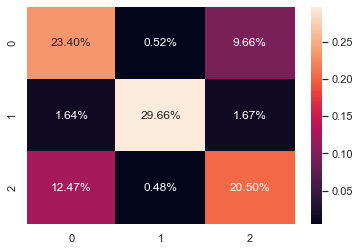

In [159]:
cf_lr = confusion_matrix(test_y, y_lr_predict)
sns.heatmap(cf_lr/np.sum(cf_lr), annot=True, fmt='.2%')

### RandomForestClassifier

In [160]:
rfc = RandomForestClassifier()

In [161]:
model_rfr = rfc.fit(train_x, train_y)
y_rfr_predict = model_rfr.predict(test_x)

In [162]:
RFR_df = pd.DataFrame(data = {"Actual": test_y, "Predicted": y_rfr_predict})

In [163]:
RFR_df

,Actual,Predicted
353052,0,0
1022390,1,1
1001211,1,1
834254,2,2
996251,1,1
...,...,...
923986,2,2
509534,0,0
842723,2,2
1063890,2,2


In [164]:
model_rfr.score(test_x, test_y)

0.9373582544772034

<AxesSubplot:>

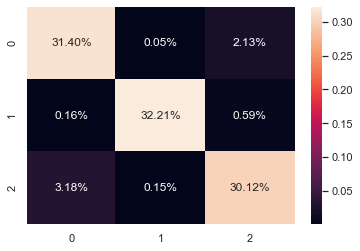

In [165]:
cf_rf = confusion_matrix(test_y, y_rfr_predict)
sns.heatmap(cf_rf/np.sum(cf_rf), annot=True, fmt='.2%')

In [166]:
precision_score(test_y, y_rfr_predict, average='macro')

0.9382546176380894

In [167]:
f1_score(test_y, y_rfr_predict, average='macro')

0.9377655211589171

In [168]:
recall_score(test_y, y_rfr_predict, average='macro')

0.9375497702057918